# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Load Data

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,content,label
0,"Liputan6.com, London - Lee Dixon khawatir Arse...",bola
1,"Liputan6.com, Jakarta - Kasus dugaan penganiay...",news
2,"Liputan6.com, Jakarta Menanggapi aksi eks peke...",bisnis
3,"Liputan6.com, Medan - Sebanyak 81 kendaraan 4x...",bola
4,"Liputan6.com, Jakarta Indonesia akan melawan T...",bola


In [3]:
df.shape

(6127, 2)

In [4]:
df.dtypes

content    object
label      object
dtype: object

In [5]:
df.isna().sum()

content    0
label      0
dtype: int64

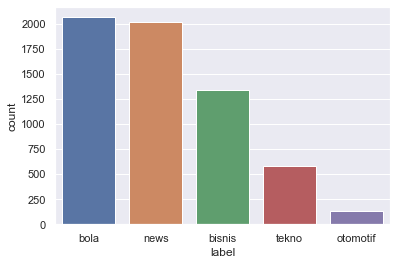

In [6]:
sns.countplot(df.label);

In [7]:
df.content[0]

'Liputan6.com, London - Lee Dixon khawatir Arsenal tak bisa merekrut Denis Suarez secara permanen musim panas nanti. Pasalnya sejauh ini, Suarez hanya menjadi cadangan bagi The Gunners.\n\nSuarez dipinjam Arsenal dari Barcelona, Januari lalu. The Gunners juga bisa membelinya pada akhir musim nanti jika permainannya memuaskan.\n\nNamun sejauh ini Suarez tak menjadi pilihan utama di Arsenal. Manajer Unai Emery baru memberinya kesempatan bermain selama 85 menit.\n\n"Emery mungkin tahu kualitas Suarez. Dia tahu Suarez pemain yang dibutuhkannya," kata Dixon seperti dilansir Evening Standard.\n\n"Namun dari sudut pandang Suarez, dia pasti berpikir untuk apa pindah kalau tidak bermain. Jadi mungkin saja dia akan menolak Arsenal," katanya menambahkan.'

In [8]:
df.content[122]

'Liputan6.com, Jakarta - Dampak keluarnya Inggris dari Uni Eropa atau Brexit berdampak cukup besar bagi industri otomotif. Salah satunya, dengan ditutupnya pabrik Jaguar Land Rover (JLR) di Negeri Britania, pada April 2019. Lalu, dengan penutupan tempat perakitan tersebut, apa dampaknya bagi penjualan di Indonesia?\n\nDijelaskan Jentri Izhar, Brand Director JLR Indonesia, untuk di pasar Indonesia sendiri memang belum ada pengaruhnya. Namun, jika diprediksi, penutupan pabrik JLR ini bakal mempengaruhi harga jual kendaraannya di pasar otomotif nasional.\n\n"Pengaruhnya nanti lebih ke produksi, karena supply chain-nya nanti bagaimana tergantung dari sana," jelas Izhar saat berbincang dengan wartawan beberapa waktu lalu.\n\nSementara itu, untuk waktu pengirimannya juga tidak akan berpengaruh, karena tidak ada hubungannya dengan penutupan pabrik. "Pengiriman itu cukup fleksibel, jadi paling pengaruhnya di harga (lebih mahal)," tegasnya.\n\nBerbicara soal strategi JLR dengan penutupan pabrik

# Cleaning

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [10]:
def cleansing(text):
    text = text.lower()
    word_list = word_tokenize(text)
    word_list = [word for word in word_list if len(word) > 1 and word.isalpha()]
    word_list = [word for word in word_list if word not in punctuation]
    text = ' '.join(word_list)
    return text

In [11]:
df['content'] = df.content.apply(cleansing)

In [12]:
df.content[10]

'jakarta barcelona punya pengalaman buruk saat membeli pemain bertahan belia dari brasil banyak yang gagal di nou camp dan malah membuat rugi barcelona ada dua pemain belakang berbakat brasil yang pernah dibeli mahal oleh barcelona yakni douglas dan henrique keduanya gagal total di barcelona sehingga kemudian dijual murah setelah sempat dipinjamkan ke beberapa klub kenyataan pahit tersebut tak membuat barcelona kapok berburu bek muda brasil blaugrana dikabarkan selangkah lagi mendapatkan bek berbakat palmeiras vitao penggawa timnas brasil itu sudah diamati pencari bakat barcelona sejak beberapa pekan terakhir negosiasi nampaknya berjalan cukup baik marca melaporkan vitao dan agennya sudah terlihat berada di barcelona untuk menyelesaikan kepindahannya pemuda tahun itu baru akan bergabung ke nou camp musim panas nanti'

In [13]:
df.content[122]

'jakarta dampak keluarnya inggris dari uni eropa atau brexit berdampak cukup besar bagi industri otomotif salah satunya dengan ditutupnya pabrik jaguar land rover jlr di negeri britania pada april lalu dengan penutupan tempat perakitan tersebut apa dampaknya bagi penjualan di indonesia dijelaskan jentri izhar brand director jlr indonesia untuk di pasar indonesia sendiri memang belum ada pengaruhnya namun jika diprediksi penutupan pabrik jlr ini bakal mempengaruhi harga jual kendaraannya di pasar otomotif nasional pengaruhnya nanti lebih ke produksi karena supply nanti bagaimana tergantung dari sana jelas izhar saat berbincang dengan wartawan beberapa waktu lalu sementara itu untuk waktu pengirimannya juga tidak akan berpengaruh karena tidak ada hubungannya dengan penutupan pabrik pengiriman itu cukup fleksibel jadi paling pengaruhnya di harga lebih mahal tegasnya berbicara soal strategi jlr dengan penutupan pabrik ini memang belum dibicarakan lebih lanjut pasalnya memang hingga saat in

In [14]:
df.head()

,content,label
0,london lee dixon khawatir arsenal tak bisa mer...,bola
1,jakarta kasus dugaan penganiayaan terhadap dua...,news
2,jakarta menanggapi aksi eks pekerja pt freepor...,bisnis
3,medan sebanyak kendaraan dan motor telah tiba ...,bola
4,jakarta indonesia akan melawan thailand di fin...,bola


# Dataset Splitting

In [15]:
X_train = df.content
y_train = df.label

# Create StopWords

In [16]:
bow = CountVectorizer()

In [17]:
bow_matrix = bow.fit_transform(X_train)

In [18]:
term = bow.get_feature_names()

sums = bow_matrix.sum(axis=0)

data = []

for col, term in enumerate(term):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['term', 'frekuensi'])
ranking.head()

,term,frekuensi
0,aa,19
1,aaa,1
2,aaib,16
3,aaid,1
4,aakibat,1


In [19]:
stopwords = ranking.sort_values('frekuensi', ascending=False).head(500)
stopwords

,term,frekuensi
34864,yang,22988
6248,di,22859
5763,dan,18465
12205,ini,12634
6094,dengan,10181
...,...,...
19256,menerima,336
13537,kan,336
33378,tuan,335
2106,barang,334


In [20]:
stopwords.to_excel('data/stopwords.xlsx', index=False)